In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ROOT as R
R.gROOT.SetBatch(True)
from rootpy.plotting import Canvas, Hist, Legend

## Monte Carlo Glauber
### Relating Simulation to $\frac{dN}{d\eta}$

#### Two Component Model
In the two component model we assume that the number of charged particles produced per unit of pseudorapidity is proportional to Npart for soft processes and Ncoll for hard process. Soft collisions cause the participating nucleons to become excited. When these excited nucleons decay they produce particles ( mostly pions ) with small transverse momentum. However, particles created with large amounts of transverse momentum are assumed to be related to hard collisions between nucleons. Therefor the total $dN/d\eta$ is assumed to be a combination of these to processes where we assume :

##$ \frac{dN_{ch}}{d\eta} = N_{pp}\left( x  N_{coll} + (1 - x) \frac{N_{part}}{2}  \right) $

Where $x$ is the "hardness" scale - related to the amount of momentum carried by the quark inside the proton, and N$_{pp}$ is the average number of particle produced per particpant 


In [5]:
def getNB( n, mK, mNpp ) :
    c = R.TMath.Exp( R.TMath.LnGamma( n + mK ) - R.TMath.LnGamma( n+1 ) - R.TMath.LnGamma( mK ) )
    x = n * R.TMath.Log( mNpp / mK ) - ( n+mK ) * R.TMath.Log( mNpp / mK + 1.0 )
    return c * R.TMath.Exp( x )

In [6]:
getNB( 5, .012, .107 )

0.0014068638605474121

In [26]:
hnb = R.TH1D( "hnb1", "hnb", 500, 0, 50 )

In [27]:
for ib in range( 1, 500 ) :
    hnb.SetBinContent( ib, getNB( ib, 2.0, 1.172 ) )

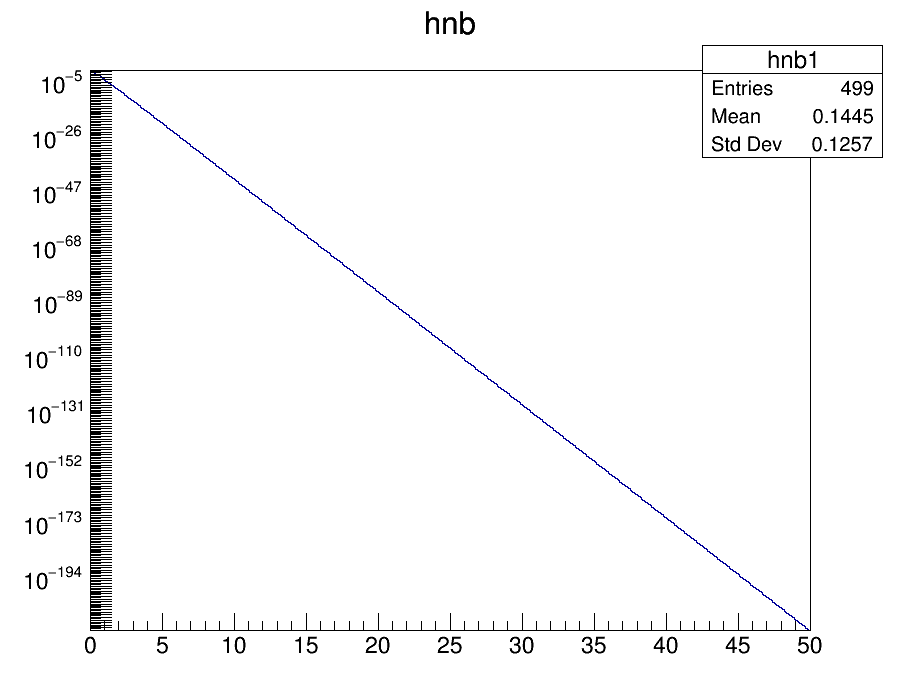

In [28]:
can = Canvas( width=900, height=700 )
hnb.Draw()
R.gPad.SetLogy(1)
can

## Two Component Model